# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations

lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Build partial query
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# # https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url+city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    try:
       # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        #print(response)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity =response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping..")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | parad
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | povenets
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | bagaha
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | rocha
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | kalmunai
Processing Record 14 of Set 1 | alugan
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | micheweni
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set 1 | atuona
Processing Record 23 of Set 1 | thompson
Proces

Processing Record 37 of Set 4 | norman wells
Processing Record 38 of Set 4 | langsa
Processing Record 39 of Set 4 | sungaipenuh
Processing Record 40 of Set 4 | kupang
Processing Record 41 of Set 4 | jagraon
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | taber
Processing Record 44 of Set 4 | rock sound
Processing Record 45 of Set 4 | wlodawa
Processing Record 46 of Set 4 | parakai
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | tokur
Processing Record 49 of Set 4 | samarai
Processing Record 0 of Set 5 | naze
Processing Record 1 of Set 5 | okhotsk
Processing Record 2 of Set 5 | paamiut
Processing Record 3 of Set 5 | kasane
Processing Record 4 of Set 5 | ozgon
City not found. Skipping..
Processing Record 5 of Set 5 | sarti
Processing Record 6 of Set 5 | karcsa
Processing Record 7 of Set 5 | ijaki
City not found. Skipping..
Processing Record 8 of Set 5 | touros
Processing Record 9 of Set 5 | george town
Processing Record 10 of Set 

Processing Record 27 of Set 8 | palencia
Processing Record 28 of Set 8 | ust-uda
Processing Record 29 of Set 8 | luanda
Processing Record 30 of Set 8 | mount pleasant
Processing Record 31 of Set 8 | shimoda
Processing Record 32 of Set 8 | linares
Processing Record 33 of Set 8 | chapais
Processing Record 34 of Set 8 | gresham
Processing Record 35 of Set 8 | moerai
Processing Record 36 of Set 8 | pisco
Processing Record 37 of Set 8 | launceston
Processing Record 38 of Set 8 | bilma
Processing Record 39 of Set 8 | lahad datu
Processing Record 40 of Set 8 | bethel
Processing Record 41 of Set 8 | araouane
Processing Record 42 of Set 8 | puerto escondido
Processing Record 43 of Set 8 | ust-ordynskiy
Processing Record 44 of Set 8 | ucluelet
Processing Record 45 of Set 8 | kawalu
Processing Record 46 of Set 8 | borba
Processing Record 47 of Set 8 | acapulco
Processing Record 48 of Set 8 | kavaratti
Processing Record 49 of Set 8 | talnakh
Processing Record 0 of Set 9 | mahibadhoo
Processing Rec

Processing Record 18 of Set 12 | florianopolis
Processing Record 19 of Set 12 | druzhba
Processing Record 20 of Set 12 | vanimo
Processing Record 21 of Set 12 | asosa
Processing Record 22 of Set 12 | moate
Processing Record 23 of Set 12 | sal rei
Processing Record 24 of Set 12 | betsiamites
Processing Record 25 of Set 12 | quatre cocos
Processing Record 26 of Set 12 | salinas
Processing Record 27 of Set 12 | lano
Processing Record 28 of Set 12 | inhambane
Processing Record 29 of Set 12 | ust-kamchatsk
City not found. Skipping..
Processing Record 30 of Set 12 | veraval
Processing Record 31 of Set 12 | tuatapere
Processing Record 32 of Set 12 | clyde river
Processing Record 33 of Set 12 | tynda
Processing Record 34 of Set 12 | khuzhir
Processing Record 35 of Set 12 | leh
Processing Record 36 of Set 12 | valparaiso
Processing Record 37 of Set 12 | ankazobe
Processing Record 38 of Set 12 | santa fe
Processing Record 39 of Set 12 | changying
Processing Record 40 of Set 12 | flinders
Process

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,24.09,88,20,4.63,TO,1682082267
1,parad,47.9232,20.0297,15.47,50,100,3.74,HU,1682082268
2,port alfred,-33.5906,26.8910,20.10,59,6,3.58,ZA,1682082269
3,hermanus,-34.4187,19.2345,16.56,52,100,3.14,ZA,1682082271
4,povenets,62.8487,34.8262,4.08,93,100,2.55,RU,1682082272
...,...,...,...,...,...,...,...,...,...
558,vila franca do campo,37.7167,-25.4333,16.23,64,78,7.59,PT,1682082994
559,puerto quijarro,-17.7833,-57.7667,24.80,53,1,1.77,BO,1682082996
560,bandar,2.0500,99.7500,24.77,97,100,1.28,ID,1682082975
561,along,28.1667,94.7667,22.49,69,48,0.74,IN,1682082999


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,24.09,88,20,4.63,TO,1682082267
1,parad,47.9232,20.0297,15.47,50,100,3.74,HU,1682082268
2,port alfred,-33.5906,26.8910,20.10,59,6,3.58,ZA,1682082269
3,hermanus,-34.4187,19.2345,16.56,52,100,3.14,ZA,1682082271
4,povenets,62.8487,34.8262,4.08,93,100,2.55,RU,1682082272


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,24.09,88,20,4.63,TO,1682082267
1,parad,47.9232,20.0297,15.47,50,100,3.74,HU,1682082268
2,port alfred,-33.5906,26.8910,20.10,59,6,3.58,ZA,1682082269
3,hermanus,-34.4187,19.2345,16.56,52,100,3.14,ZA,1682082271
4,povenets,62.8487,34.8262,4.08,93,100,2.55,RU,1682082272


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

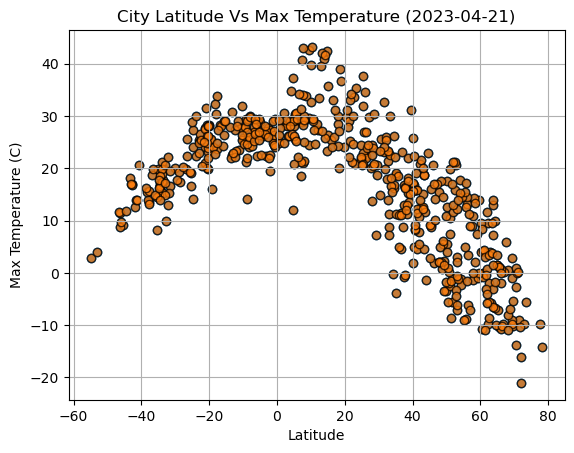

In [9]:
# Build scatter plot for latitude vs. temperature

sec = list(city_data_df['Date'])
time_string = time.strftime("%Y-%m-%d", time.gmtime(sec[0]))

# Incorporate the other graph properties
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude Vs Max Temperature ({time_string})')
plt.grid(True)
plt.scatter(x,y,edgecolors='black', alpha =0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

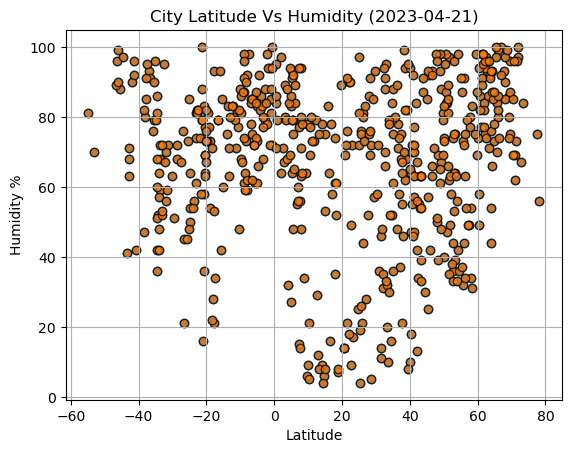

In [10]:
# Build the scatter plots for latitude vs. humidity

# Incorporate the other graph properties
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'City Latitude Vs Humidity ({time_string})')
plt.grid(True)
plt.scatter(x,y,edgecolors='black', alpha =0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

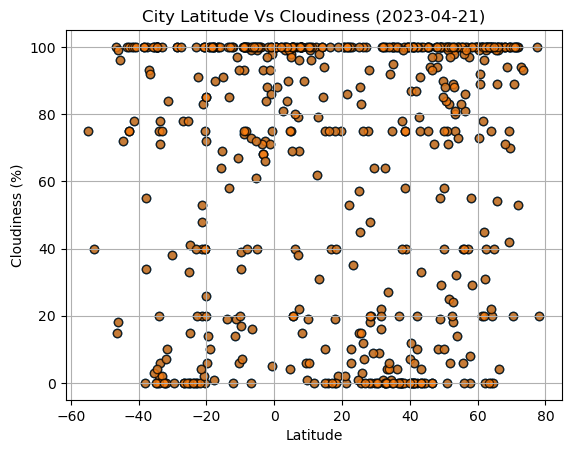

In [11]:
# Build the scatter plots for latitude vs. cloudiness

# Incorporate the other graph properties
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude Vs Cloudiness ({time_string})')
plt.grid(True)
plt.scatter(x,y,edgecolors='black', alpha =0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

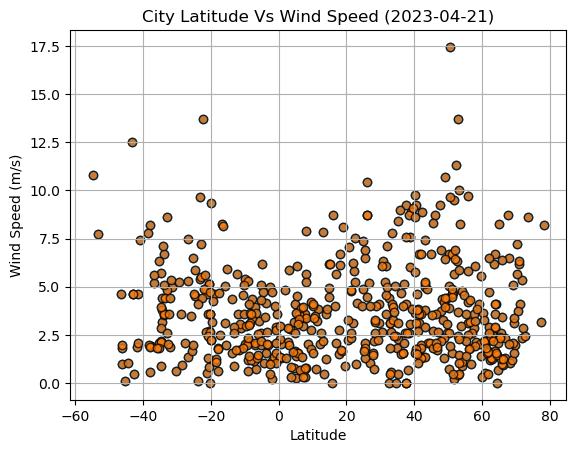

In [12]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude Vs Wind Speed ({time_string})')
plt.grid(True)
plt.scatter(x,y,edgecolors='black', alpha =0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def find_lin_reg(x_axis,y_axis):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x,y) 
    regress_value = slope*x + intercept
    return(slope,intercept,rvalue,regress_value)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
filt = city_data_df['Lat'] >= 0
northern_hemi_df = city_data_df[filt]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,parad,47.9232,20.0297,15.47,50,100,3.74,HU,1682082268
4,povenets,62.8487,34.8262,4.08,93,100,2.55,RU,1682082272
7,bagaha,27.1000,84.0833,29.76,28,100,1.06,IN,1682082277
10,klaksvik,62.2266,-6.5890,9.51,75,0,1.20,FO,1682082281
11,albany,42.6001,-73.9662,12.66,55,79,1.34,US,1682082276


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
filt = city_data_df['Lat'] < 0
southern_hemi_df = city_data_df[filt]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,24.09,88,20,4.63,TO,1682082267
2,port alfred,-33.5906,26.8910,20.10,59,6,3.58,ZA,1682082269
3,hermanus,-34.4187,19.2345,16.56,52,100,3.14,ZA,1682082271
5,ushuaia,-54.8000,-68.3000,2.81,81,75,10.80,AR,1682082237
6,hobart,-42.8794,147.3294,16.92,68,75,4.63,AU,1682082154


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7092657569355818


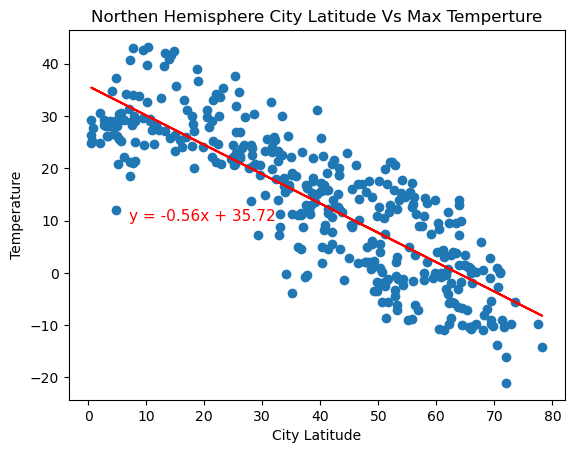

In [16]:
# Linear regression on Northern Hemisphere
x = round(northern_hemi_df['Lat'],2)
y = round(northern_hemi_df['Max Temp'],2)

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_value = slope*x + intercept

# Show scatter plot with regression line
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.xlabel('City Latitude')
plt.ylabel('Temperature')
plt.title(f'Northen Hemisphere City Latitude Vs Max Temperture')

# Line annotation
line_equ = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.annotate(line_equ,xy=(7,10),xytext=(7,10),fontsize=11,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

The r-squared is: 0.5977712569221288


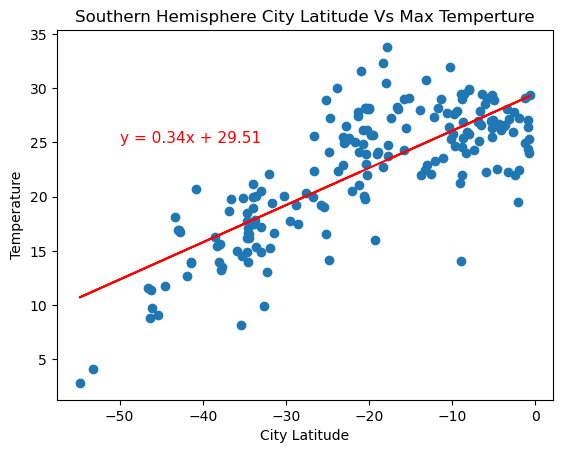

In [17]:
# Linear regression on Southern Hemisphere vs max temperture

x = round(southern_hemi_df['Lat'],2)
y = round(southern_hemi_df['Max Temp'],2)

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_value = slope*x + intercept

# Show scatter plot with regression line
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.xlabel('City Latitude')
plt.ylabel('Temperature')
plt.title(f'Southern Hemisphere City Latitude Vs Max Temperture')

# Line annotation
line_equ = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.annotate(line_equ,xy=(-50,25),xytext=(-50,25),fontsize=11,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:**
* Northern Hemisphere Vs Temperature
    * For cities in northern hemisphere, the temperature decreses as latitude increases above 0 degrees
    * The rvalue for northern hemisphere 0.7767720300778328, which means there is a significant and positive relationship between the latitude and temperature
* Southern Hemisphere Vs Temperature
    * For cities in southern hemisphere, the temperature decreses as latitude decreases below 0 degrees
    * The rvalue for southern hemisphere 0.5490828567742796, which means there is a moderate association between  between the latitude and temperature
    

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06633265469679922


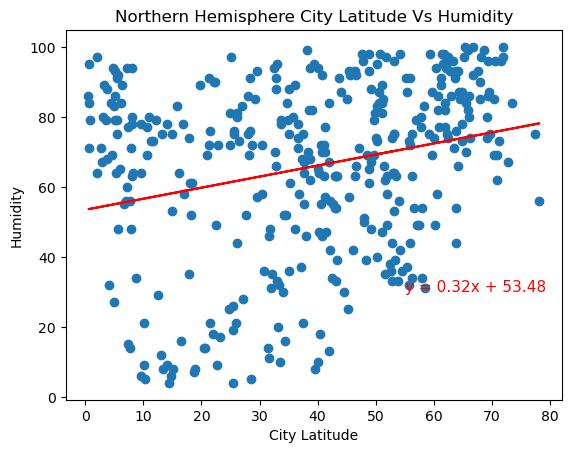

In [18]:
# Northern Hemisphere city vs Humidity

x = round(northern_hemi_df['Lat'],2)
y = round(northern_hemi_df['Humidity'],2)

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_value = slope*x + intercept

# Show scatter plot with regression line
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Hemisphere City Latitude Vs Humidity')

# Line annotation
line_equ = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.annotate(line_equ,xy=(55,30),xytext=(55,30),fontsize=11,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

The r-squared is: 0.021355212553753476


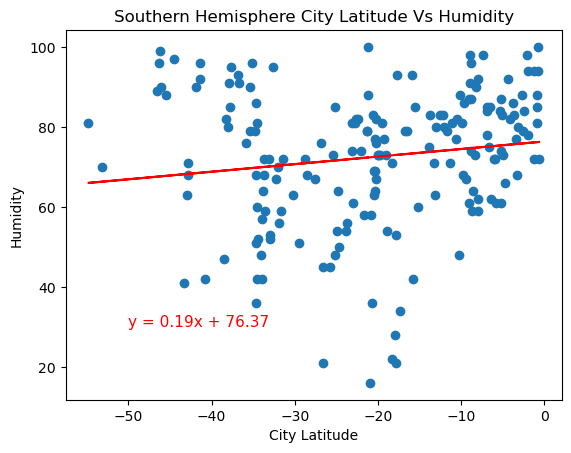

In [19]:
# Southern Hemisphere city vs Humidity

x = round(southern_hemi_df['Lat'],2)
y = round(southern_hemi_df['Humidity'],2)

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_value = slope*x + intercept

# Show scatter plot with regression line
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere City Latitude Vs Humidity')

# Line annotation
line_equ = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.annotate(line_equ,xy=(-50,30),xytext=(-50,30),fontsize=11,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** 

* Northern & Southern Hemisphere Lat Vs Humidity
    * For cities in northern & southern hemispheres, there is a weak realtionship (Northern rvalue = 0.03355952526435302, southern rvalue = 0.14035457939754611) between humidity and latitude.
    

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.006393475842755685


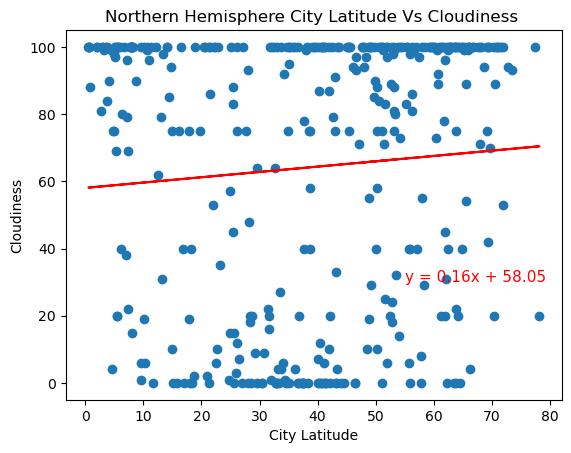

In [20]:
# Northern Hemisphere city vs Cloudiness

x = round(northern_hemi_df['Lat'],2)
y = round(northern_hemi_df['Cloudiness'],2)
results = find_lin_reg(x,y)

# Show scatter plot with regression line
plt.scatter(x,y)
plt.plot(x,results[3],"r-")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere City Latitude Vs Cloudiness ')

# Line annotation
line_equ = "y = " + str(round(results[0],2)) + "x + " +str(round(results[1],2))
plt.annotate(line_equ,xy=(55,30),xytext=(55,30),fontsize=11,color="red")
print(f"The r-squared is: {results[2]**2}")


plt.show()

The r-squared is: 0.0275583790360229


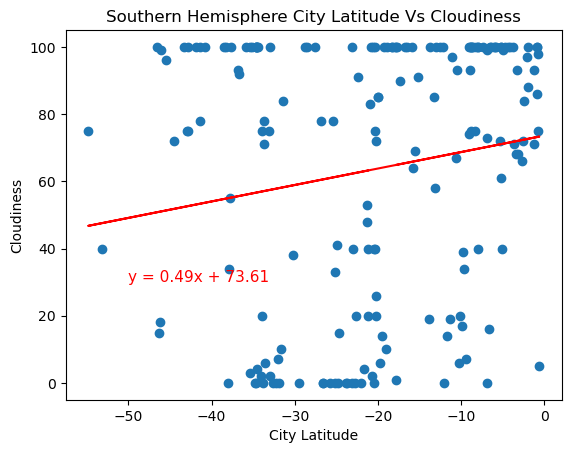

In [21]:
# Southern Hemisphere city vs Cloudiness

x = round(southern_hemi_df['Lat'],2)
y = round(southern_hemi_df['Cloudiness'],2)

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_value = slope*x + intercept

# Show scatter plot with regression line
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere City Latitude Vs Cloudiness')

# Line annotation
line_equ = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.annotate(line_equ,xy=(-50,30),xytext=(-50,30),fontsize=11,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** 

* Northern Hemisphere Vs Cloudiness
    * For cities in northern hemisphere, there is no relationship between cloudinesss and latitude (rvalue =0.012268882747813502) 
* Southern Hemisphere Vs Cloudiness
    * For cities in southern hemisphere, there is a very weak relationship between cloudinesss and latitude (rvalue =0.05825612388656912) 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004612565931029375


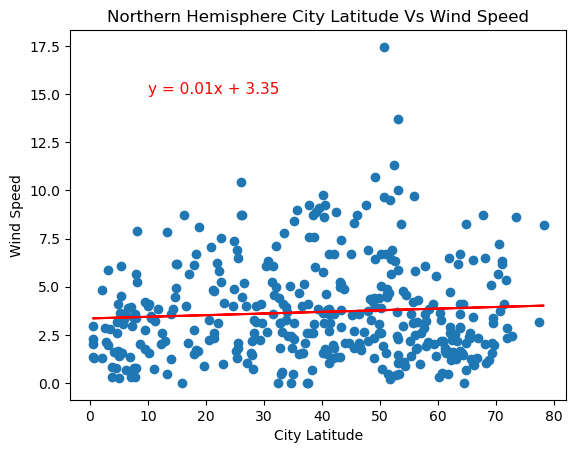

In [22]:
# Northern Hemisphere city vs Wind Speed

x = round(northern_hemi_df['Lat'],2)
y = round(northern_hemi_df['Wind Speed'],2)
results = find_lin_reg(x,y)

# Show scatter plot with regression line
plt.scatter(x,y)
plt.plot(x,results[3],"r-")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Northern Hemisphere City Latitude Vs Wind Speed')

# Line annotation
line_equ = "y = " + str(round(results[0],2)) + "x + " +str(round(results[1],2))
plt.annotate(line_equ,xy=(10,15),xytext=(10,15),fontsize=11,color="red")
print(f"The r-squared is: {results[2]**2}")


plt.show()

The r-squared is: 0.05990143435046876


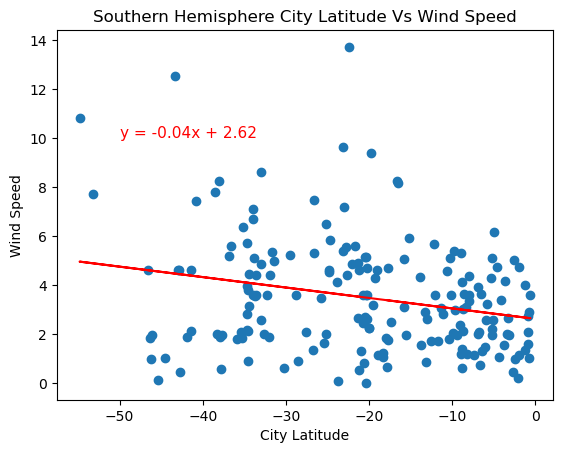

In [23]:
# Southern Hemisphere city vs Wind Speed

x = round(southern_hemi_df['Lat'],2)
y = round(southern_hemi_df['Wind Speed'],2)

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_value = slope*x + intercept

# Show scatter plot with regression line
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Southern Hemisphere City Latitude Vs Wind Speed')

# Line annotation
line_equ = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.annotate(line_equ,xy=(-50,10),xytext=(-50,10),fontsize=11,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** 

* Northern Hemisphere Vs Wind Speed
    * For cities in northern hemisphere, there is no relationship between Wind Speed and latitude (rvalue =0.009004607992873752) 
* Southern Hemisphere Vs Wind Speed
    * For cities in southern hemisphere, there is a weak relationship between Wind Speed and latitude (rvalue =0.1299053288582956) 